In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
df=pd.read_csv(r"/content/weatherHistory.csv")

**Data Preprocessing**







In [7]:
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
df.isnull().sum()

,0
Formatted Date,0
Summary,1
Precip Type,1
Temperature (C),1
Apparent Temperature (C),1
Humidity,1
Wind Speed (km/h),1
Wind Bearing (degrees),1
Visibility (km),1
Loud Cover,1


In [9]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],errors='coerce', utc=True)
df


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
22033,2008-06-12 23:00:00+00:00,Overcast,rain,17.172222,17.172222,0.92,2.3184,184.0,12.0428,0.0,1007.49,Mostly cloudy throughout the day.
22034,2008-06-13 00:00:00+00:00,Partly Cloudy,rain,13.133333,13.133333,0.80,9.4346,287.0,14.0553,0.0,1010.58,Mostly cloudy throughout the day.
22035,2008-06-13 01:00:00+00:00,Overcast,rain,16.644444,16.644444,0.92,2.5760,159.0,10.0464,0.0,1006.68,Mostly cloudy throughout the day.
22036,2008-06-13 02:00:00+00:00,Overcast,rain,16.083333,16.083333,0.93,6.9874,10.0,9.9015,0.0,1006.20,Mostly cloudy throughout the day.


In [10]:
df['Precip Type'].fillna(method='ffill', inplace=True)
df.fillna(method='ffill', inplace=True)
df

<ipython-input-10-7366af04142b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(method='ffill', inplace=True)
<ipython-input-10-7366af04142b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Precip Type'].fillna(method='ffill', inplace=True)
<ipython-input-10-7366af04142b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
22033,2008-06-12 23:00:00+00:00,Overcast,rain,17.172222,17.172222,0.92,2.3184,184.0,12.0428,0.0,1007.49,Mostly cloudy throughout the day.
22034,2008-06-13 00:00:00+00:00,Partly Cloudy,rain,13.133333,13.133333,0.80,9.4346,287.0,14.0553,0.0,1010.58,Mostly cloudy throughout the day.
22035,2008-06-13 01:00:00+00:00,Overcast,rain,16.644444,16.644444,0.92,2.5760,159.0,10.0464,0.0,1006.68,Mostly cloudy throughout the day.
22036,2008-06-13 02:00:00+00:00,Overcast,rain,16.083333,16.083333,0.93,6.9874,10.0,9.9015,0.0,1006.20,Mostly cloudy throughout the day.


In [11]:
df.duplicated().sum()

1

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

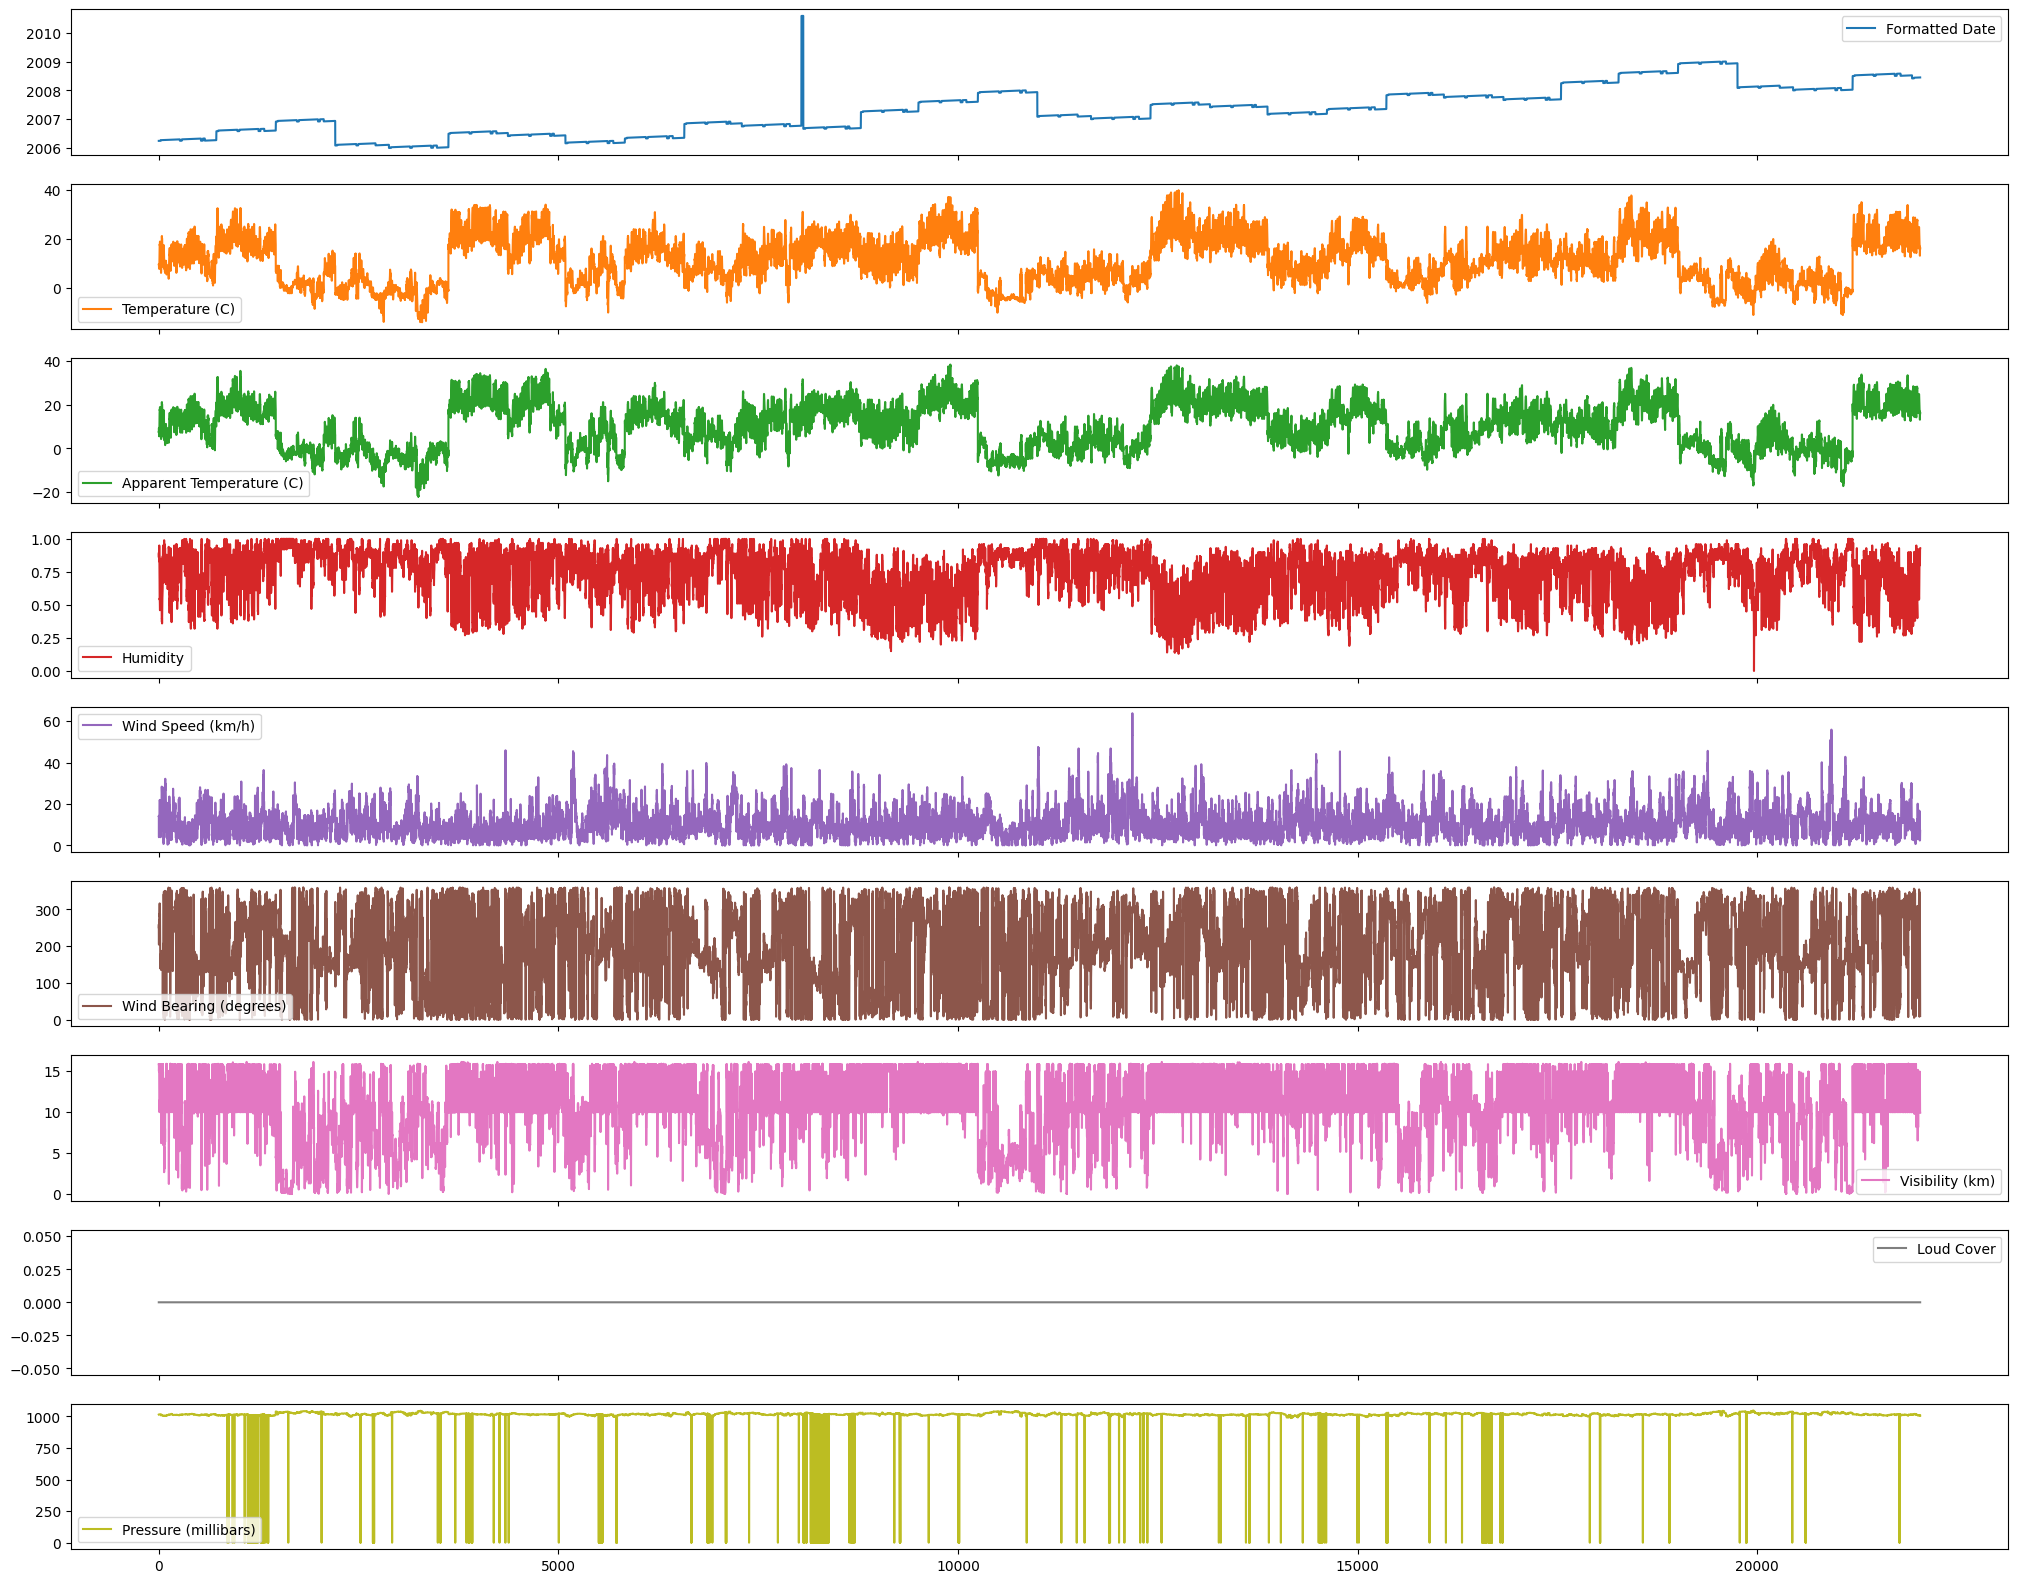

In [12]:
df.plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'Formatted Date'}>,
        <Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>],
       [<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>],
       [<Axes: title={'center': 'Visibility (km)'}>,
        <Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>]], dtype=object)

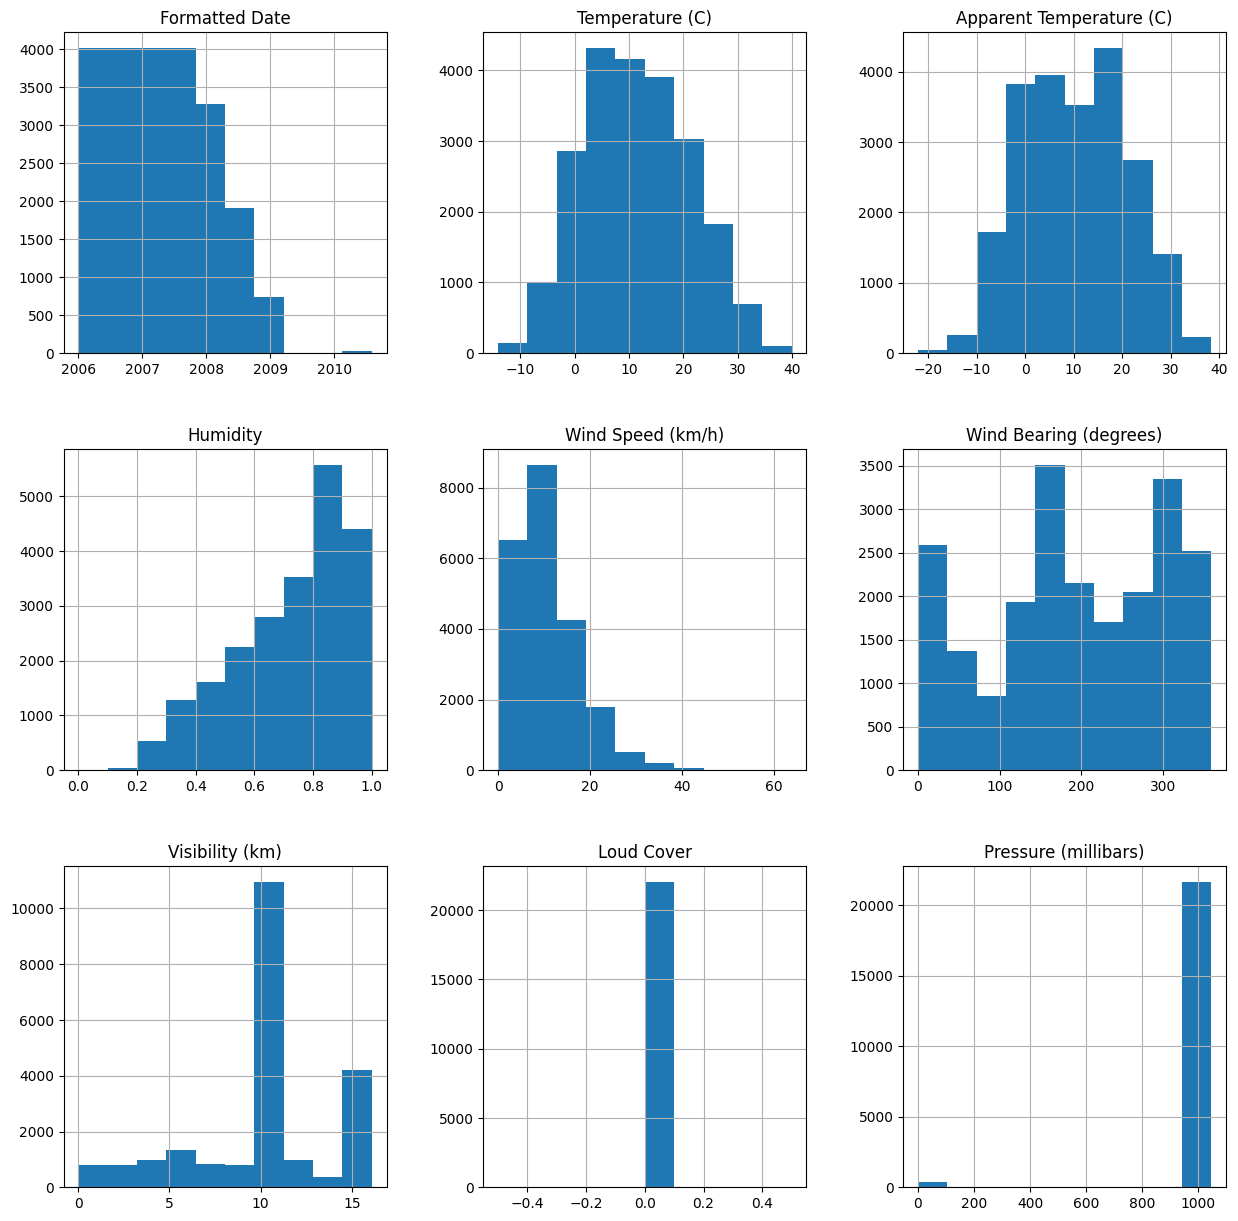

In [13]:
df.hist(bins=10,figsize=(15,15))

In [20]:
numerical_columns = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'
]

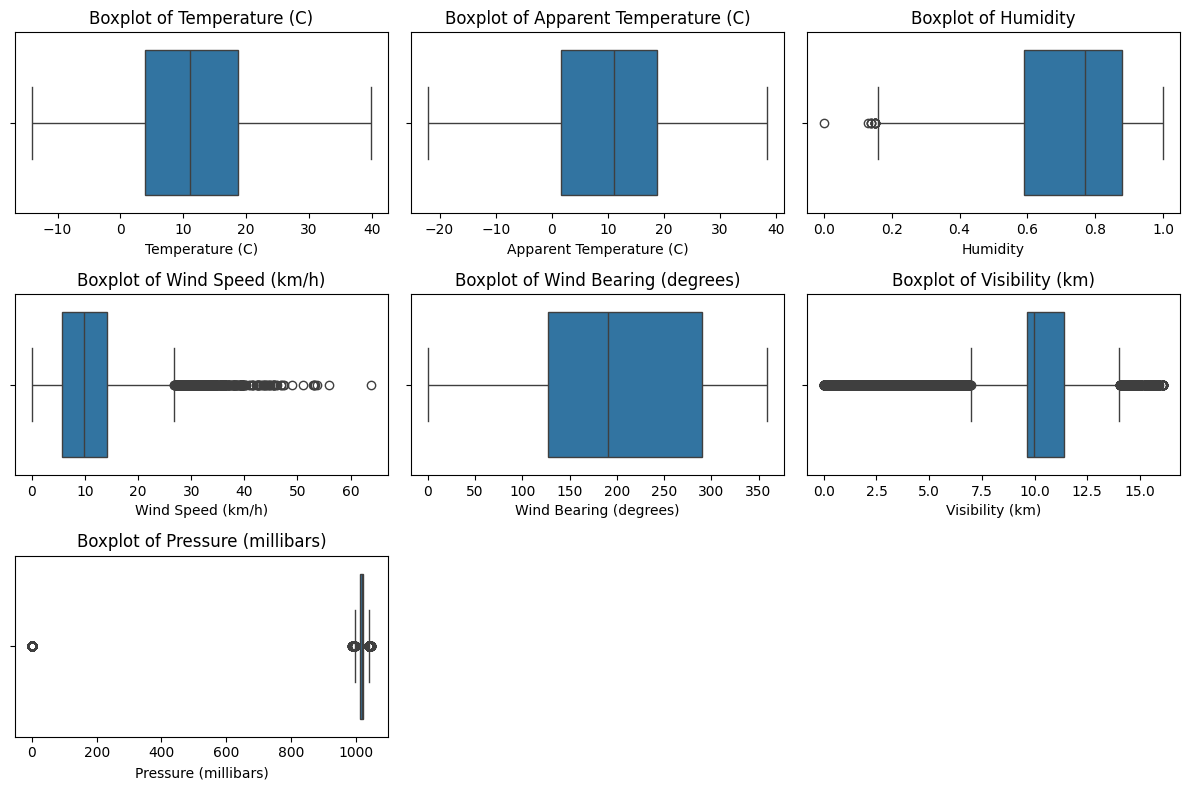

In [19]:
#outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [31]:
# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip values outside the bounds
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

        # Print number of outliers handled
        num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        print(f"{column}: {num_outliers} outliers handled.")

    return df_cleaned

In [32]:
selected_columns = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
data_selected = data[selected_columns]

In [33]:
# Remove outliers using the IQR method
data_cleaned = remove_outliers_iqr(data_selected, selected_columns)

Temperature (C): 0 outliers handled.
Humidity: 12 outliers handled.
Wind Speed (km/h): 654 outliers handled.
Visibility (km): 8590 outliers handled.
Pressure (millibars): 807 outliers handled.


In [35]:
# Display before and after statistics
print("\n--- Original Data Statistics ---")
print(data.describe())

print("\n--- Cleaned Data Statistics ---")
print(data_cleaned.describe())


--- Original Data Statistics ---
       Temperature (C)      Humidity  Wind Speed (km/h)  Visibility (km)  \
count     22038.000000  22038.000000       22038.000000     22038.000000   
mean         11.553282      0.722447          10.759809        10.080597   
std           9.689890      0.192171           6.919044         3.801432   
min         -14.088889      0.000000           0.000000         0.000000   
25%           3.933333      0.590000           5.635000         9.627800   
50%          11.138889      0.770000           9.788800         9.982000   
75%          18.731944      0.880000          14.119700        11.398800   
max          39.905556      1.000000          63.852600        16.100000   

       Pressure (millibars)  
count          22038.000000  
mean            1000.405937  
std              133.125674  
min                0.000000  
25%             1012.240000  
50%             1017.040000  
75%             1022.790000  
max             1046.380000  

--- Cleane

In [36]:
data_cleaned.to_csv("cleaned_data.csv", index=False)
print("\nCleaned data saved to 'cleaned_data.csv'")


Cleaned data saved to 'cleaned_data.csv'


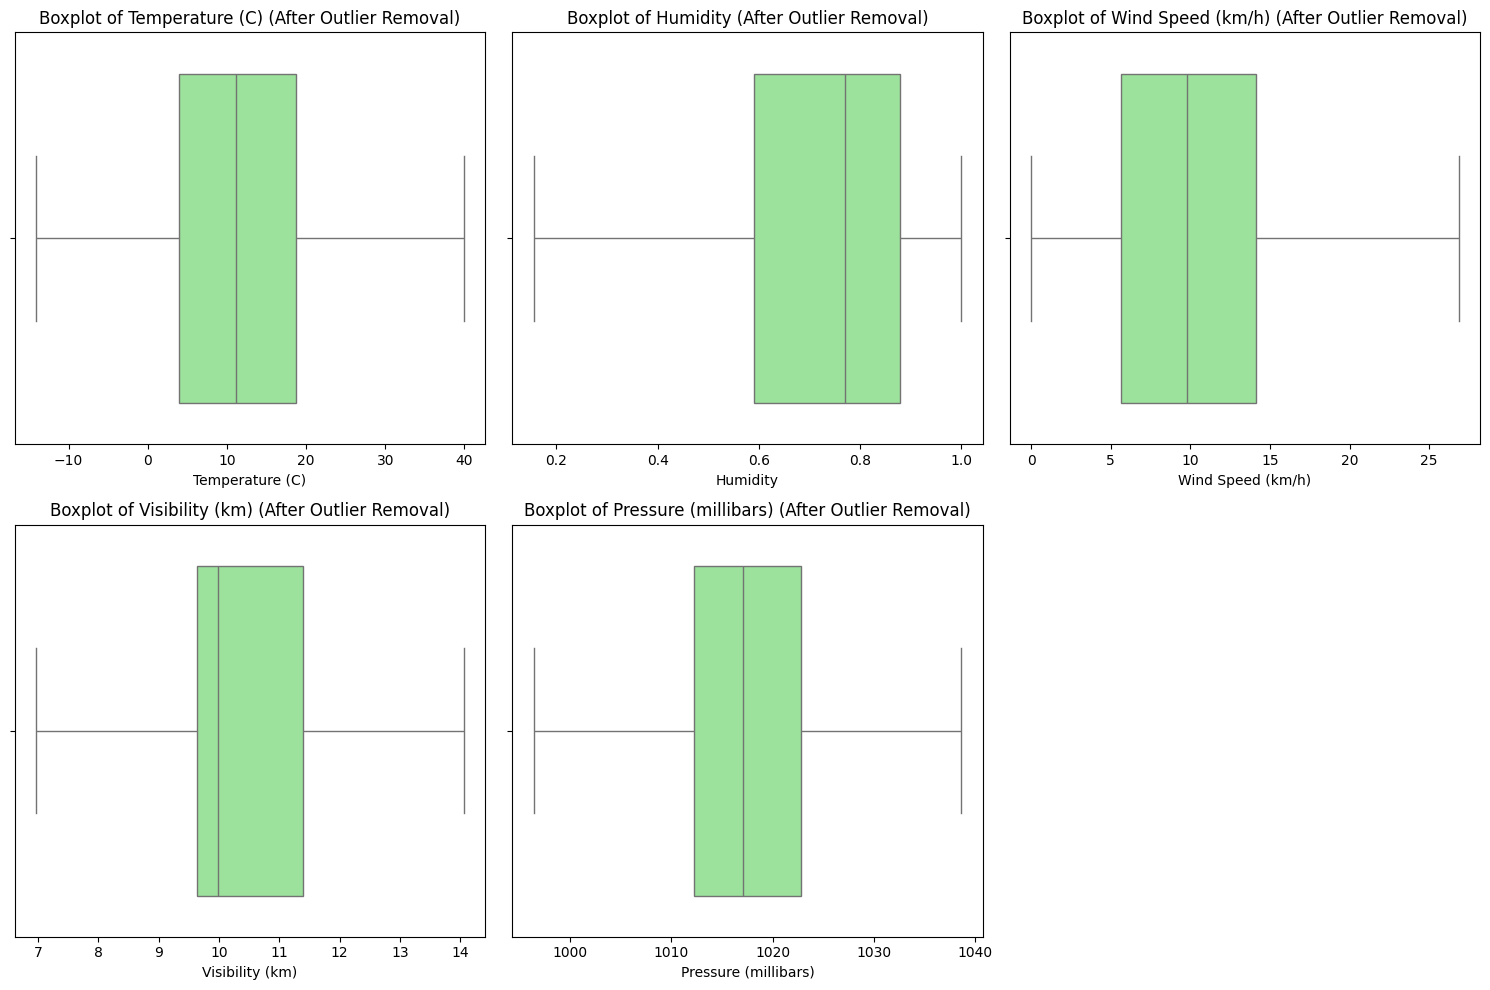

In [37]:
# Visualize boxplots after handling outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data_cleaned, x=col, color='lightgreen')
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

In [38]:
#extracting data components
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] =df['Formatted Date'].dt.day
df['Hour'] = df['Formatted Date'].dt.hour
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22033,2008-06-12 23:00:00+00:00,Overcast,rain,17.172222,17.172222,0.92,2.3184,184.0,12.0428,0.0,1007.49,Mostly cloudy throughout the day.,2008,6,12,23
22034,2008-06-13 00:00:00+00:00,Partly Cloudy,rain,13.133333,13.133333,0.80,9.4346,287.0,14.0553,0.0,1010.58,Mostly cloudy throughout the day.,2008,6,13,0
22035,2008-06-13 01:00:00+00:00,Overcast,rain,16.644444,16.644444,0.92,2.5760,159.0,10.0464,0.0,1006.68,Mostly cloudy throughout the day.,2008,6,13,1
22036,2008-06-13 02:00:00+00:00,Overcast,rain,16.083333,16.083333,0.93,6.9874,10.0,9.9015,0.0,1006.20,Mostly cloudy throughout the day.,2008,6,13,2


In [39]:
df.drop(['Loud Cover'], axis=1, inplace=True)

In [40]:
df['Rain'] = df['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Rain
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006,3,31,22,1
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006,3,31,23,1
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006,4,1,0,1
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006,4,1,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22033,2008-06-12 23:00:00+00:00,Overcast,rain,17.172222,17.172222,0.92,2.3184,184.0,12.0428,1007.49,Mostly cloudy throughout the day.,2008,6,12,23,1
22034,2008-06-13 00:00:00+00:00,Partly Cloudy,rain,13.133333,13.133333,0.80,9.4346,287.0,14.0553,1010.58,Mostly cloudy throughout the day.,2008,6,13,0,1
22035,2008-06-13 01:00:00+00:00,Overcast,rain,16.644444,16.644444,0.92,2.5760,159.0,10.0464,1006.68,Mostly cloudy throughout the day.,2008,6,13,1,1
22036,2008-06-13 02:00:00+00:00,Overcast,rain,16.083333,16.083333,0.93,6.9874,10.0,9.9015,1006.20,Mostly cloudy throughout the day.,2008,6,13,2,1


In [41]:
# Drop Irrelevant Columns
columns_to_drop = ['Formatted Date', 'Loud Cover', 'Precip Type', 'Summary', 'Daily Summary']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year,Month,Day,Hour,Rain
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,22,1
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,23,1
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,0,1
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,1,1
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22033,17.172222,17.172222,0.92,2.3184,184.0,12.0428,1007.49,2008,6,12,23,1
22034,13.133333,13.133333,0.80,9.4346,287.0,14.0553,1010.58,2008,6,13,0,1
22035,16.644444,16.644444,0.92,2.5760,159.0,10.0464,1006.68,2008,6,13,1,1
22036,16.083333,16.083333,0.93,6.9874,10.0,9.9015,1006.20,2008,6,13,2,1


In [42]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [43]:
X = df.drop(columns=['Rain'])  # Features
y = df['Rain']

In [44]:
print("Features (X):\n", X.head())
print("\nTarget (y):\n", y.head())

Features (X):
    Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0        -0.214771                 -0.280913  0.871915           0.485612   
1        -0.226811                 -0.295847  0.715801           0.506554   
2        -0.224518                 -0.096556  0.871915          -0.987357   
3        -0.336894                 -0.414803  0.559687           0.483285   
4        -0.288733                 -0.319020  0.559687           0.041161   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  Year  Month  \
0                0.547443         1.511492              0.110605  2006      3   
1                0.623445         1.511492              0.114361  2006      3   
2                0.100930         1.282783              0.116690  2006      4   
3                0.718447         1.511492              0.120220  2006      4   
4                0.623445         1.511492              0.120972  2006      4   

   Day  Hour  
0   31    22  
1   3

**Vanilla LSTM Model**

In [46]:
X = np.expand_dims(X, axis=1)

In [47]:
# Print the shape of X and y
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (22038, 1, 11)
Shape of target (y): (22038,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
#Printing the shapes of the resulting datasets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (17630, 1, 11)
Shape of X_test: (4408, 1, 11)
Shape of y_train: (17630,)
Shape of y_test: (4408,)


In [50]:
sequence_length = 10
train_gen = TimeseriesGenerator(X_train, y_train, length=sequence_length, batch_size=32)
test_gen = TimeseriesGenerator(X_test, y_test, length=sequence_length, batch_size=32)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [57]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='sigmoid')
])

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# Train the Vanilla LSTM model
print("Training Vanilla LSTM Model...")
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Training Vanilla LSTM Model...
Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4529 - loss: 58.2984 - val_accuracy: 0.8548 - val_loss: 0.3833
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8791 - loss: 0.3381 - val_accuracy: 0.8811 - val_loss: 0.3032
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8925 - loss: 0.2603 - val_accuracy: 0.8861 - val_loss: 0.2414
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9034 - loss: 0.2139 - val_accuracy: 0.9217 - val_loss: 0.1949
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9216 - loss: 0.1886 - val_accuracy: 0.9372 - val_loss: 0.1734
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9330 - loss: 0.1659 - val_accuracy: 0.9195 - val_loss: 0.1661
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9405 - loss: 0.1566 - val_accuracy: 0.9294 - val_loss: 0.1541
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9422 -

In [60]:
# Predictions
train_preds = (model.predict(X_train) > 0.5).astype(int)
test_preds = (model.predict(X_test) > 0.5).astype(int)

551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [61]:
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
overall_accuracy = (train_accuracy * len(y_train) + test_accuracy * len(y_test)) / (len(y_train) + len(y_test))

In [62]:
print(f"Vanilla LSTM - Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Vanilla LSTM - Testing Accuracy: {test_accuracy * 100:.2f}%")
print("overall accuracy",overall_accuracy)

Vanilla LSTM - Training Accuracy: 95.45%
Vanilla LSTM - Testing Accuracy: 94.96%
overall accuracy 0.9534894273527543


**Stacked LSTM Model**

In [63]:
# Define Stacked LSTM model
stacked_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
stacked_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
# Train the model
stacked_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7156 - loss: 3.0247 - val_accuracy: 0.8725 - val_loss: 0.3795
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8808 - loss: 0.3640 - val_accuracy: 0.8725 - val_loss: 0.3655
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8786 - loss: 0.3459 - val_accuracy: 0.8725 - val_loss: 0.2792
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8851 - loss: 0.2673 - val_accuracy: 0.9025 - val_loss: 0.2397
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9111 - loss: 0.2050 - val_accuracy: 0.8734 - val_loss: 0.3315
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9227 - loss: 0.1779 - val_accuracy: 0.9437 - val_loss: 0.1351
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9335 - loss: 0.1493 - val_accuracy: 0.9551 - val_loss: 0.1141
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9558 - loss: 0.1110 - val_accuracy: 0.

In [65]:
# Predictions
train_preds = (stacked_model.predict(X_train) > 0.5).astype(int)
test_preds = (stacked_model.predict(X_test) > 0.5).astype(int)

551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [66]:
# Evaluate
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
overall_accuracy = (train_accuracy * len(y_train) + test_accuracy * len(y_test)) / (len(y_train) + len(y_test))


In [67]:
print(f"Stacked LSTM - Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Stacked LSTM - Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"overall accuracy",overall_accuracy)

Stacked LSTM - Training Accuracy: 98.28%
Stacked LSTM - Testing Accuracy: 97.91%
overall accuracy 0.9820764134676468


**Bidirectional LSTM Model**

In [69]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

In [70]:
#bidirectional lstm model
bidirectional_model = Sequential([
    Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
bidirectional_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
print("--- Training Bidirectional LSTM Model ---")
bidirectional_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

--- Training Bidirectional LSTM Model ---
Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8509 - loss: 2.1821 - val_accuracy: 0.8750 - val_loss: 0.2381
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9038 - loss: 0.2222 - val_accuracy: 0.9335 - val_loss: 0.1837
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9207 - loss: 0.1890 - val_accuracy: 0.9238 - val_loss: 0.2032
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9150 - loss: 0.1889 - val_accuracy: 0.9467 - val_loss: 0.1404
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9375 - loss: 0.1481 - val_accuracy: 0.9553 - val_loss: 0.1300
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9495 - loss: 0.1286 - val_accuracy: 0.9621 - val_loss: 0.1141
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9522 - loss: 0.1242 - val_accuracy: 0.9435 - val_loss: 0.1184
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

In [73]:
# Predictions
train_preds = (bidirectional_model.predict(X_train) > 0.5).astype(int)
test_preds = (bidirectional_model.predict(X_test) > 0.5).astype(int)


551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [74]:
# Evaluate
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
overall_accuracy = (train_accuracy * len(y_train) + test_accuracy * len(y_test)) / (len(y_train) + len(y_test))


In [75]:
print(f"Bidirectional LSTM - Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Bidirectional LSTM - Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Bidirectional - overall Accuracy: {overall_accuracy * 100:.2f}%")

Bidirectional LSTM - Training Accuracy: 96.70%
Bidirectional LSTM - Testing Accuracy: 96.80%
Bidirectional - overall Accuracy: 96.72%


**CNN LSTM Model**

In [86]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

In [83]:
def build_cnn_lstm_model(input_shape):
    model = Sequential([
        # Adjusted kernel size to fit temporal dimension
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=1),
        LSTM(50, activation='relu', return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [84]:
# Ensure input shape is correct
input_shape = (X_train.shape[1], X_train.shape[2])
cnn_lstm_model = build_cnn_lstm_model(input_shape)
cnn_lstm_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 1, 64)               │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,819 (93.04 KB)

 Trainable params: 23,819 (93.04 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
# Train the Model
cnn_lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8629 - loss: 0.4796 - val_accuracy: 0.9242 - val_loss: 0.2550
Epoch 2/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8868 - loss: 0.2815 - val_accuracy: 0.8725 - val_loss: 0.4272
Epoch 3/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9080 - loss: 0.2267 - val_accuracy: 0.9424 - val_loss: 0.1495
Epoch 4/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9236 - loss: 0.1709 - val_accuracy: 0.8632 - val_loss: 0.2804
Epoch 5/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9167 - loss: 0.1983 - val_accuracy: 0.9018 - val_loss: 0.1959
Epoch 6/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9306 - loss: 0.1561 - val_accuracy: 0.9710 - val_loss: 0.0905
Epoch 7/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9480 - loss: 0.1205 - val_accuracy: 0.8798 - val_loss: 0.3378
Epoch 8/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9387 - loss: 0.1428 - val_accuracy: 0.

In [87]:
# Make Predictions
train_preds = (cnn_lstm_model.predict(X_train) > 0.5).astype(int)
test_preds = (cnn_lstm_model.predict(X_test) > 0.5).astype(int)

551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [88]:
# Calculate Accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
overall_accuracy = (train_accuracy * len(y_train) + test_accuracy * len(y_test)) / (len(y_train) + len(y_test))

In [91]:
# Print Results
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")
print(f"Overall Accuracy: {overall_accuracy*100:.2f}%")


Training Accuracy: 96.58%
Testing Accuracy: 96.51%
Overall Accuracy: 96.57%


**Convultional LSTM Model**

In [93]:
from tensorflow.keras.layers import BatchNormalization, Dropou

In [108]:
def build_convlstm_model(input_shape):
    model = Sequential([
        ConvLSTM2D(
            filters=64,
            kernel_size=(3, 3),
            activation='relu',
            input_shape=input_shape,
            return_sequences=False,
            padding='same'
        ),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [103]:
# Reshape input to match ConvLSTM requirements
X_train_clstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2], 1)
X_test_clstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2], 1)

In [104]:
# Define input shape for the ConvLSTM
input_shape_clstm = (X_train_clstm.shape[1], X_train_clstm.shape[2], X_train_clstm.shape[3], X_train_clstm.shape[4])


In [109]:
# Build the model
convlstm_model = build_convlstm_model(input_shape_clstm)
convlstm_model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_lstm2d_3 (ConvLSTM2D)           │ (None, 1, 11, 64)           │         150,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 11, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          90,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,641 (940.00 KB)

 Trainable params: 240,513 (939.50 KB)

 Non-trainable params: 128 (512.00 B)

In [110]:
# Train the ConvLSTM Model
history = convlstm_model.fit(
    X_train_clstm, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_clstm, y_test),
    verbose=1
)

Epoch 1/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.9469 - loss: 0.1172 - val_accuracy: 0.8861 - val_loss: 0.5069
Epoch 2/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9844 - loss: 0.0340 - val_accuracy: 0.9868 - val_loss: 0.0265
Epoch 3/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9820 - loss: 0.0385 - val_accuracy: 0.9939 - val_loss: 0.0184
Epoch 4/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9890 - loss: 0.0238 - val_accuracy: 0.9923 - val_loss: 0.0181
Epoch 5/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9887 - loss: 0.0271 - val_accuracy: 0.9909 - val_loss: 0.0193
Epoch 6/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9897 - loss: 0.0226 - val_accuracy: 0.9880 - val_loss: 0.0217
Epoch 7/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9878 - loss: 0.0266 - val_accuracy: 0.9902 - val_loss: 0.0185
Epoch 8/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9886 - loss: 0.0246 - v

In [111]:
# Predictions
train_preds = (convlstm_model.predict(X_train_clstm) > 0.5).astype(int)
test_preds = (convlstm_model.predict(X_test_clstm) > 0.5).astype(int)

551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [112]:
# Calculate Accuracies
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
overall_accuracy = (train_accuracy * len(y_train) + test_accuracy * len(y_test)) / (len(y_train) + len(y_test))


In [113]:
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")
print(f"Overall Accuracy: {overall_accuracy*100:.2f}%")

Training Accuracy: 99.21%
Testing Accuracy: 99.07%
Overall Accuracy: 99.18%
